In [2]:
!pip install gensim scikit-learn matplotlib

In [18]:
# Import necessary libraries
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


In [4]:

# Extended dataset
dataset = [
    "word embeddings are fascinating",
    "word2vec captures semantic relationships",
    "GloVe considers global context",
    "FastText extends Word2Vec with subword information",
    "natural language processing involves understanding text",
    "machine learning powers NLP applications",
    "text embeddings help in semantic similarity",
    "skip-gram is a technique in word2vec",
    "CBOW focuses on context prediction",
    "neural networks model language effectively",
    "GloVe captures co-occurrence statistics",
    "FastText models subword units",
    "contextual embeddings enhance NLP models",
    "transformers have revolutionized NLP tasks",
    "attention mechanisms improve model focus",
    "sequence-to-sequence models handle translation tasks",
    "large language models power generative AI",
    "embedding spaces visualize semantic similarity"
]

# Utility function for preprocessing
def preprocess_data(data):
    """Tokenize sentences into word lists."""
    return [sentence.split() for sentence in data]


In [5]:

# Function to train Word2Vec model
def train_word2vec(data):
    tokenized_data = preprocess_data(data)
    model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to train FastText model
def train_fasttext(data):
    tokenized_data = preprocess_data(data)
    model = FastText(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
    return model


In [19]:

# Function to plot embeddings
def plot_embeddings(model, title):
    """
    Plot 2D representations of word embeddings using t-SNE.
    """

    labels = model.wv.index_to_key
    vectors = [model.wv[word] for word in labels]

    # Reduce dimensions with t-SNE
    vectors = np.array(vectors)
    tsne_model = TSNE(perplexity=40, n_components=2, n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    # Plotting
    x, y = zip(*new_values)
    plt.figure(figsize=(12, 10))
    plt.scatter(x, y)
    for i, label in enumerate(labels):
        plt.annotate(label, xy=(x[i], y[i]), xytext=(5, 2),
                      textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()


# Train models
word2vec_model = train_word2vec(dataset)
fasttext_model = train_fasttext(dataset)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


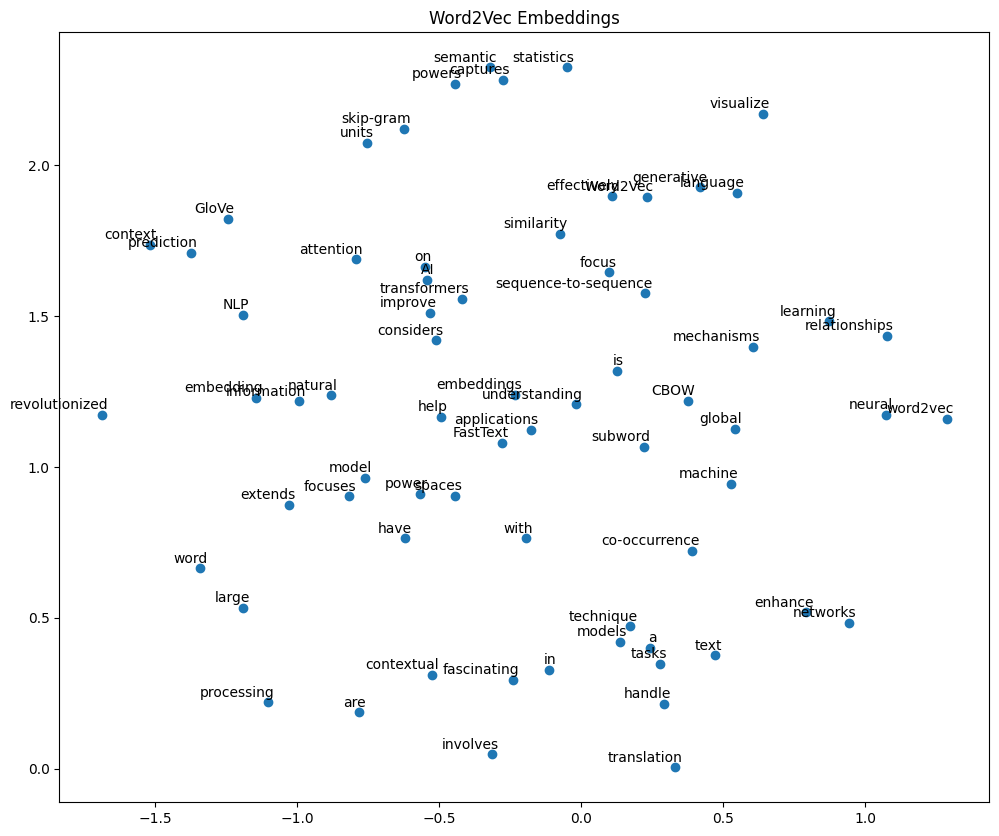

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


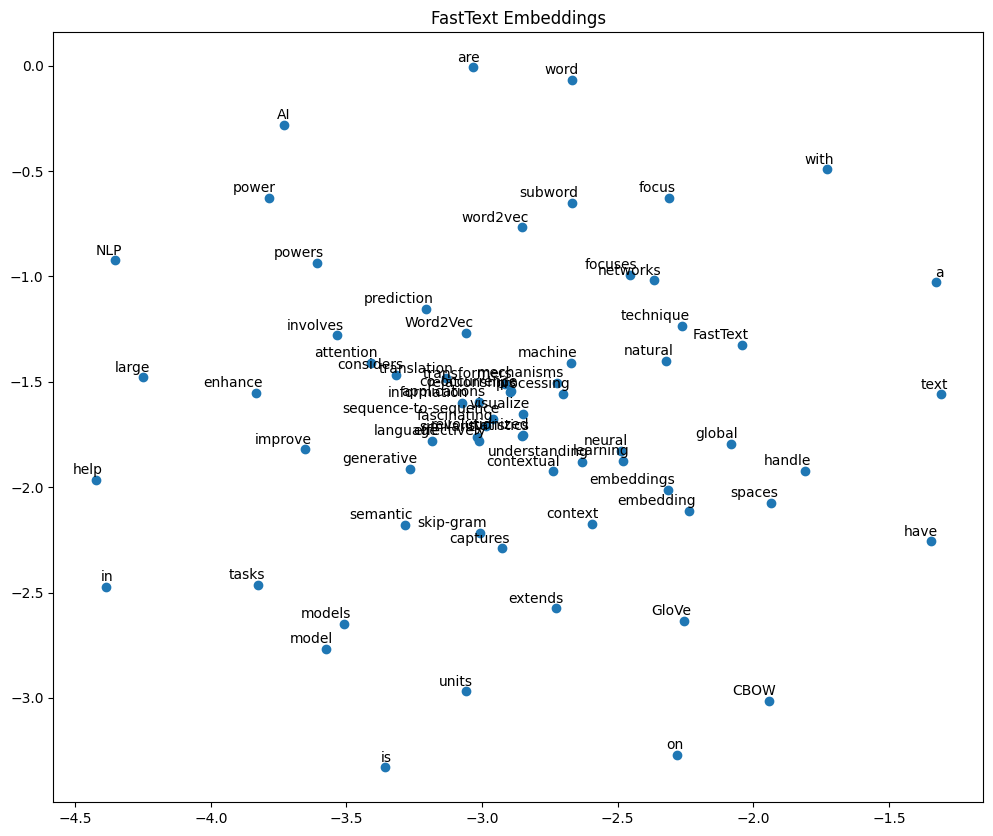

In [20]:

# Plot embeddings
plot_embeddings(word2vec_model, 'Word2Vec Embeddings')
plot_embeddings(fasttext_model, 'FastText Embeddings')
